After some general exploration, the analysis later on focuses on the long-term rental market.

What minimum stay numbers seem typical for longer-term rentals?

Are apartments with longer minimum stays a lower average price?

Which neighborhoods in Brooklyn have good prices for long-term rentals?


In [37]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")


In [38]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
data.shape

(48895, 16)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Some null values in the last_review and reviews_per_month columns

In [41]:
# Checking for duplicates

data.duplicated().sum()

np.int64(0)

In [42]:
# Create a dictionary for how I want to rename the columns

column_mapper = {
    'neighbourhood_group': 'borough',
    'neighbourhood': 'neighborhood'
}

data = data.rename(columns=column_mapper)

data


,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


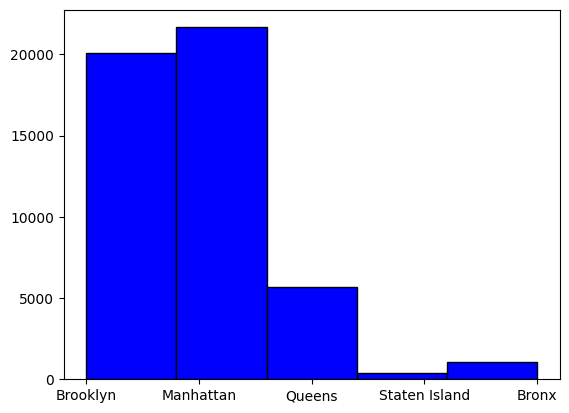

In [43]:
# Creating histograms for the categorical variables borough and room_type

# Histogram for borough
import matplotlib.pyplot as plt 

plt.hist(data['borough'], bins=5, color='blue', edgecolor='black')
plt.show()

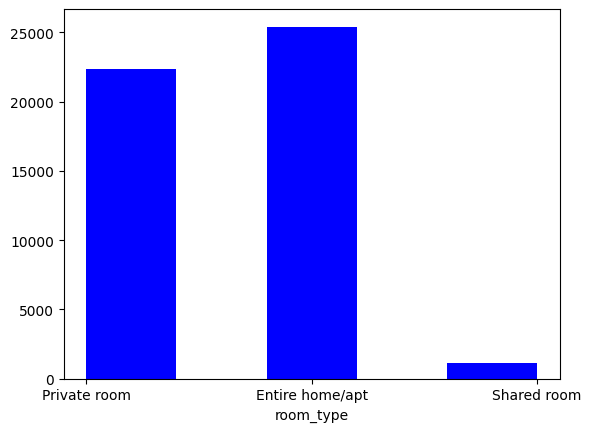

In [44]:
# Histogram for room_type
plt.hist(data['room_type'], bins=5, color='blue')
plt.xlabel('room_type')
plt.show()

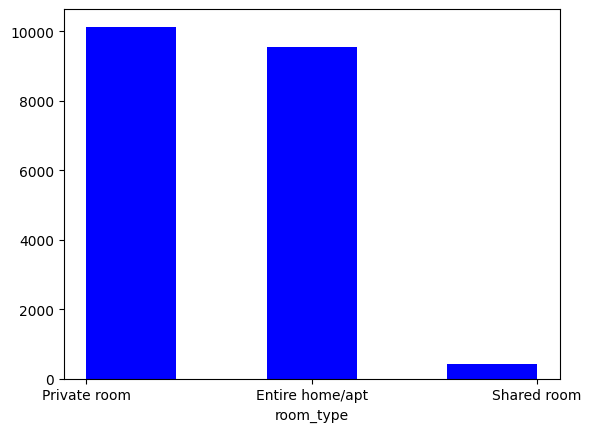

In [45]:
# The majority of the listings are in Brooklyn and Manhattan, so taking a closer look at these two boroughs:
# Looking at room_type in Brooklyn

brooklyn = data[data['borough'] == 'Brooklyn']

plt.hist(brooklyn['room_type'], bins=5, color='blue')
plt.xlabel('room_type')
plt.show()

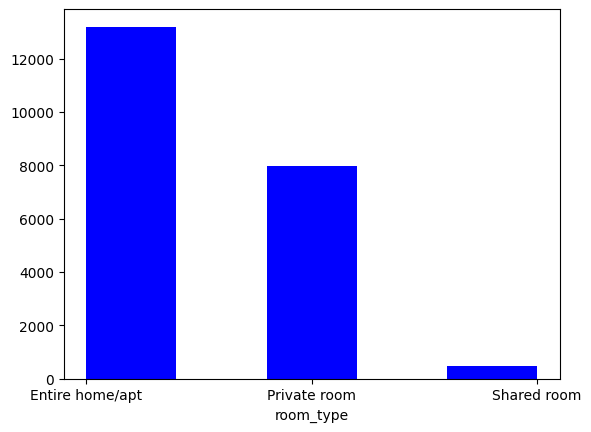

In [46]:
# Looking at room_type in Manhattan

manhattan = data[data['borough'] == 'Manhattan']

plt.hist(manhattan['room_type'], bins=5, color='blue')
plt.xlabel('room_type')
plt.show()

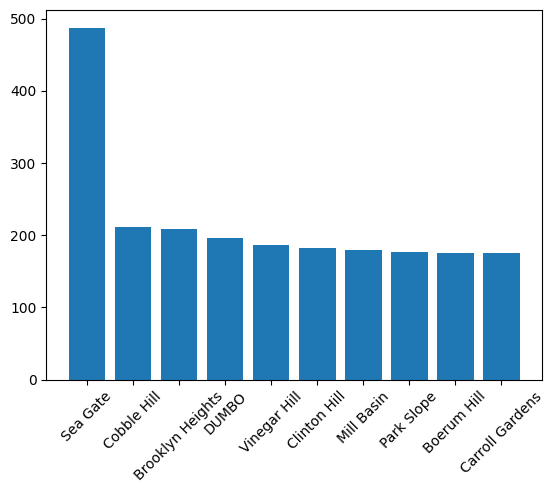

In [72]:
# Looking at neighborhood and price in Brooklyn

bk_price = brooklyn.groupby('neighborhood')['price'].mean().reset_index()
bk_price = bk_price.sort_values(by='price', ascending=False)

bk_price_top_10 = bk_price.head(10)

plt.bar(bk_price_top_10['neighborhood'], bk_price_top_10['price'])
plt.xticks(rotation=45)

plt.show()

In [48]:
# Since Sea Gate is such an outlier in average price, taking a closer look at it

sea_gate = data[data['neighborhood'] == 'Sea Gate']

sea_gate.price

3761     1485
15080     223
15081      71
15082      97
42172    1315
43651     125
48699      99
Name: price, dtype: int64

There are two outliers in Sea Gate that bring the average price up.

In [49]:
# Comparing most expensive property in Sea Gate to Brooklyn overall max.

print(f'Most expensive in Sea Gate: {sea_gate['price'].max()}')

print(f'Most expensive in Brooklyn overall: {brooklyn['price'].max()}')

Most expensive in Sea Gate: 1485
Most expensive in Brooklyn overall: 10000


Although Sea Gate has the highest average price, its most expensive property is well below the most expensive in Brooklyn overall.

In [50]:
# Look at the most expensive in Brooklyn overall

brooklyn.sort_values(by='price', ascending=False).head(10)

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
3774,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
4345,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363
25825,20654227,Fulton 2,100069033,Sarah-2,Brooklyn,Cypress Hills,40.68185,-73.88128,Entire home/apt,5000,2,4,2018-01-03,0.18,1,0
26739,21238053,Broadway 1,153497815,Sarah-B,Brooklyn,Bedford-Stuyvesant,40.68742,-73.91957,Entire home/apt,5000,2,8,2017-12-09,0.38,1,0
46614,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,30,0,NaN,NaN,1,365
4376,2952861,Photography Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69127,-73.96563,Entire home/apt,4500,1,5,2018-12-29,0.09,11,365
43670,33796251,Beautiful private Brooklyn room with kitchenette,8748976,Jeffrey,Brooklyn,Bedford-Stuyvesant,40.68807,-73.95426,Private room,4200,114,0,NaN,NaN,1,347


In [51]:
# Are there many long term rental units in Brooklyn?

brooklyn.sort_values(by='minimum_nights', ascending=False).head(20)

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26341,20990053,Beautiful place in Brooklyn! #2,151084261,Angie,Brooklyn,Williamsburg,40.71772,-73.95059,Private room,79,999,24,2018-06-28,1.12,6,249
47620,35834935,Williamsburg Apartment,82674375,Meg,Brooklyn,Williamsburg,40.70898,-73.94885,Entire home/apt,140,500,0,NaN,NaN,1,331
11193,8668115,Zen Room in Crown Heights Brooklyn,8996336,Laura,Brooklyn,Crown Heights,40.67255,-73.94914,Private room,50,500,10,2016-09-22,0.22,1,365
14285,11096888,Peaceful apartment close to F/G,2228137,Amanda,Brooklyn,Kensington,40.64779,-73.97956,Private room,45,500,0,NaN,NaN,1,358
34487,27362309,Not available,14621589,Sol,Brooklyn,Bedford-Stuyvesant,40.69974,-73.94658,Private room,50,400,0,NaN,NaN,1,90
1305,568684,800sqft apartment with huge terrace,2798644,Alessandra,Brooklyn,Bushwick,40.70202,-73.92402,Entire home/apt,115,370,6,2018-04-15,0.09,1,365
4794,3399909,Super cute and sunny 2 bedroom,39304,Andrea,Brooklyn,Williamsburg,40.71852,-73.94165,Entire home/apt,240,365,0,NaN,NaN,1,363
2150,992977,Park Slope Pre-War Apartment,4000059,Shahdiya,Brooklyn,Park Slope,40.67359,-73.97434,Entire home/apt,100,365,1,2013-08-01,0.01,1,365
20096,16095062,THANKSGIVING up to 6 GUESTS + HOT TUB + FIREPLACE,104911818,Samantha,Brooklyn,Clinton Hill,40.69487,-73.96572,Private room,225,365,0,NaN,NaN,1,90
15980,12916189,Family Friendly BK Townhome With Garden Oasis!,951917,Julia And Juan,Brooklyn,Sunset Park,40.66224,-73.99805,Entire home/apt,196,365,4,2018-05-20,0.12,1,365


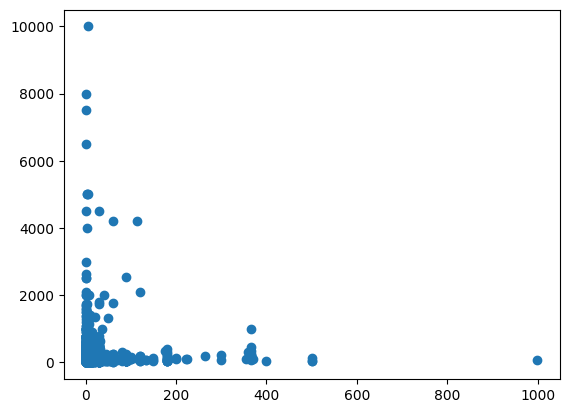

In [52]:
# Comparing price and minimum_nights in Brooklyn

plt.scatter(brooklyn['minimum_nights'], brooklyn['price'])
plt.show()

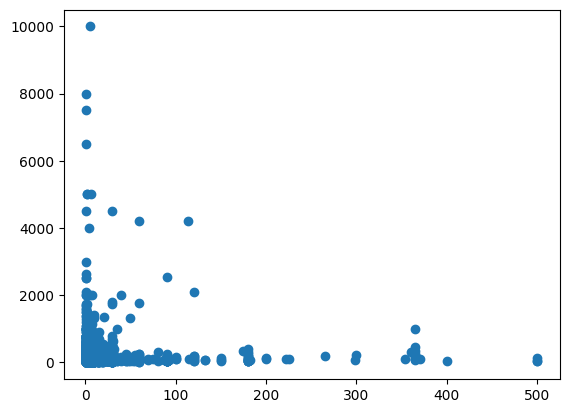

In [53]:
# Outlier of 999 minimum nights--unclear how to interpret
# Plot with outlier removed
filt_brooklyn = brooklyn[brooklyn['minimum_nights'] < 900]

plt.scatter(filt_brooklyn['minimum_nights'], filt_brooklyn['price'])
plt.show()


The values on the lower end of minumum nights vary sigificantly in terms of price. It does seem that beyond a number of nights just over 100, the price is relatively low. There appears to be a cluster of values at around the 1 year minimum mark where there is a little more variety in terms of price.

In [54]:
# What is the max minimum_nights by borough?

data.groupby('borough')['minimum_nights'].max()

borough
Bronx             365
Brooklyn          999
Manhattan        1250
Queens            500
Staten Island     365
Name: minimum_nights, dtype: int64

Manhattan has the highest max value for minimum_nights: 1250

In [55]:
manhattan.sort_values(by='minimum_nights', ascending=False).head(25)

,id,name,host_id,host_name,borough,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
38664,30378211,Shared Studio (females only),200401254,Meg,Manhattan,Greenwich Village,40.73094,-73.99900,Shared room,110,999,0,NaN,NaN,1,365
13404,10053943,Historic Designer 2 Bed. Apartment,2697686,Glenn H.,Manhattan,Harlem,40.82915,-73.94034,Entire home/apt,99,999,2,2018-01-04,0.07,1,42
8014,6169897,Wonderful Large 1 bedroom,10720264,John,Manhattan,Harlem,40.82135,-73.95521,Entire home/apt,75,500,0,NaN,NaN,1,362
15946,12888849,"Bright Luxury Studio, Central Loc.",16476167,Sarah,Manhattan,Midtown,40.74513,-73.98475,Entire home/apt,250,366,0,NaN,NaN,1,365
1449,649561,Manhattan Sky Crib (1 year sublet),3260084,David,Manhattan,Chelsea,40.75164,-73.99425,Entire home/apt,135,365,0,NaN,NaN,1,365
19794,15851599,"Stunning 1 Br, West Village Luxury w/ great views",48815188,Kevin,Manhattan,Greenwich Village,40.73317,-73.99813,Entire home/apt,295,365,15,2018-04-24,0.49,1,0
754,271694,"Easy, comfortable studio in Midtown",1387370,James,Manhattan,Midtown,40.75282,-73.97315,Entire home/apt,125,365,19,2015-09-08,0.21,1,365
2831,1586935,Luxury Gramercy Lg 1Bd w Balcony,8457613,Erin,Manhattan,Gramercy,40.73494,-73.98751,Entire home/apt,250,365,0,NaN,NaN,1,365


After a few outliers, around 1 year seems to be a more common minimum stay.

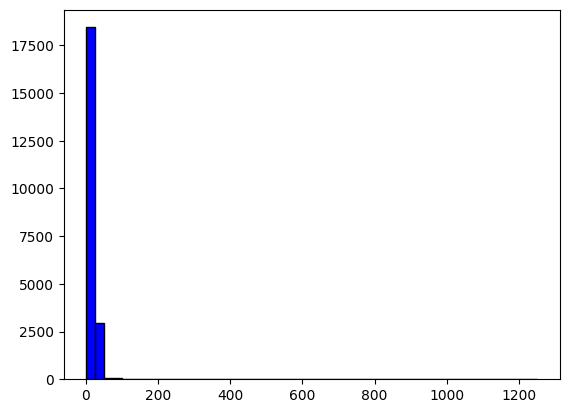

In [56]:
# Histogram of minimum nights in Manhattan

plt.hist(manhattan['minimum_nights'], bins=50, color='blue', edgecolor='black')
plt.show()


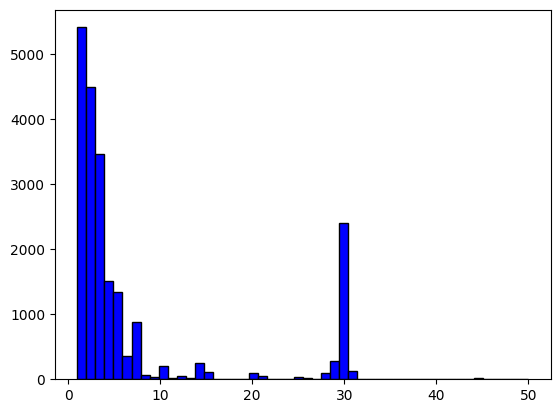

In [57]:
# Filtering the data to the range of 0 - 50 days to get a closer look at the lower range

filtered_data = data[(data['minimum_nights'] >= 0) & (data['minimum_nights'] <= 50)]

filtered_manhattan = filtered_data[filtered_data['borough'] == 'Manhattan']

plt.hist(filtered_manhattan['minimum_nights'], bins=50, color='blue', edgecolor='black')
plt.show()

It appears that 30 nigths is a common value to specify as a minimum stay, which could make it a good minimum parameter for exploring long-term stays. Now, plotting this for the other boroughs to compare.

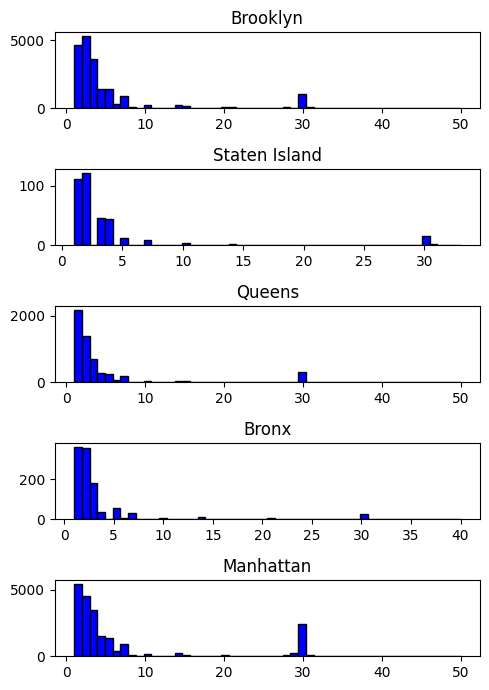

In [58]:
# Creating dataframes for each borough to look at the histograms of minimum_nights

filtered_brooklyn = filtered_data[filtered_data['borough'] == 'Brooklyn']
filtered_staten_island = filtered_data[filtered_data['borough'] == 'Staten Island']
filtered_queens = filtered_data[filtered_data['borough'] == 'Queens']
filtered_bronx = filtered_data[filtered_data['borough'] == 'Bronx']

fig, axis = plt.subplots(5, 1, figsize = (5, 7))

axis[0].hist(filtered_brooklyn['minimum_nights'], bins=50, color='blue', edgecolor='black')
axis[0].set_title('Brooklyn')

axis[1].hist(filtered_staten_island['minimum_nights'], bins=50, color='blue', edgecolor='black')
axis[1].set_title('Staten Island')

axis[2].hist(filtered_queens['minimum_nights'], bins=50, color='blue', edgecolor='black')
axis[2].set_title('Queens')

axis[3].hist(filtered_bronx['minimum_nights'], bins=50, color='blue', edgecolor='black')
axis[3].set_title('Bronx')

axis[4].hist(filtered_manhattan['minimum_nights'], bins=50, color='blue', edgecolor='black')
axis[4].set_title('Manhattan')

plt.tight_layout()

plt.show()

In [59]:
# Confirming that the visible peak is at exactly 30 by looking at value counts for all 5 boroughs

print(filtered_manhattan['minimum_nights'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10))
print(filtered_brooklyn['minimum_nights'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10))
print(filtered_staten_island['minimum_nights'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10))
print(filtered_queens['minimum_nights'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10))
print(filtered_bronx['minimum_nights'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10))

   minimum_nights  count
0               1   5418
1               2   4506
2               3   3463
3              30   2399
4               4   1508
5               5   1337
6               7    889
7               6    362
8              29    278
9              14    248
   minimum_nights  count
0               2   5321
1               1   4650
2               3   3597
3               4   1434
4               5   1383
5              30   1015
6               7    927
7               6    318
8              14    255
9              10    241
   minimum_nights  count
0               2    122
1               1    112
2               3     46
3               4     45
4              30     15
5               5     12
6               7      9
7              10      4
8              31      2
9              14      2
   minimum_nights  count
0               1   2178
1               2   1390
2               3    713
3              30    306
4               4    280
5               5    247


In [60]:
# Filtering again for the range of 30-365 days and defining it as long_term (ignoring outliers with very long minimum stays)

long_term = data[(data['minimum_nights'] >= 30) & (data['minimum_nights'] <= 365)]

# Choosing a few columns to focus on

cols = ['id', 'borough', 'neighborhood', 'price', 'minimum_nights']

long_term = long_term[cols]

long_term_manhattan = long_term[long_term['borough'] == 'Manhattan']
long_term_brooklyn = long_term[long_term['borough'] == 'Brooklyn']
long_term_staten_island = long_term[long_term['borough'] == 'Staten Island']
long_term_queens = long_term[long_term['borough'] == 'Queens']
long_term_bronx = long_term[long_term['borough'] == 'Bronx']

long_term.head()

,id,borough,neighborhood,price,minimum_nights
6,5121,Brooklyn,Bedford-Stuyvesant,60,45
14,6090,Manhattan,West Village,120,90
36,11452,Brooklyn,Bedford-Stuyvesant,35,60
55,14377,Brooklyn,Williamsburg,150,30
59,15341,Manhattan,SoHo,180,30


In [61]:
# Average price in each borough

long_term.groupby('borough')['price'].mean()

borough
Bronx             67.973684
Brooklyn         126.931854
Manhattan        234.575844
Queens           106.286908
Staten Island     88.684211
Name: price, dtype: float64

In [62]:
# Max in each borough

long_term.groupby('borough')['price'].max()

borough
Bronx              220
Brooklyn          4500
Manhattan        10000
Queens           10000
Staten Island      250
Name: price, dtype: int64

In [63]:
# Min in each borough

long_term.groupby('borough')['price'].min()

borough
Bronx            25
Brooklyn          0
Manhattan        10
Queens           24
Staten Island    40
Name: price, dtype: int64

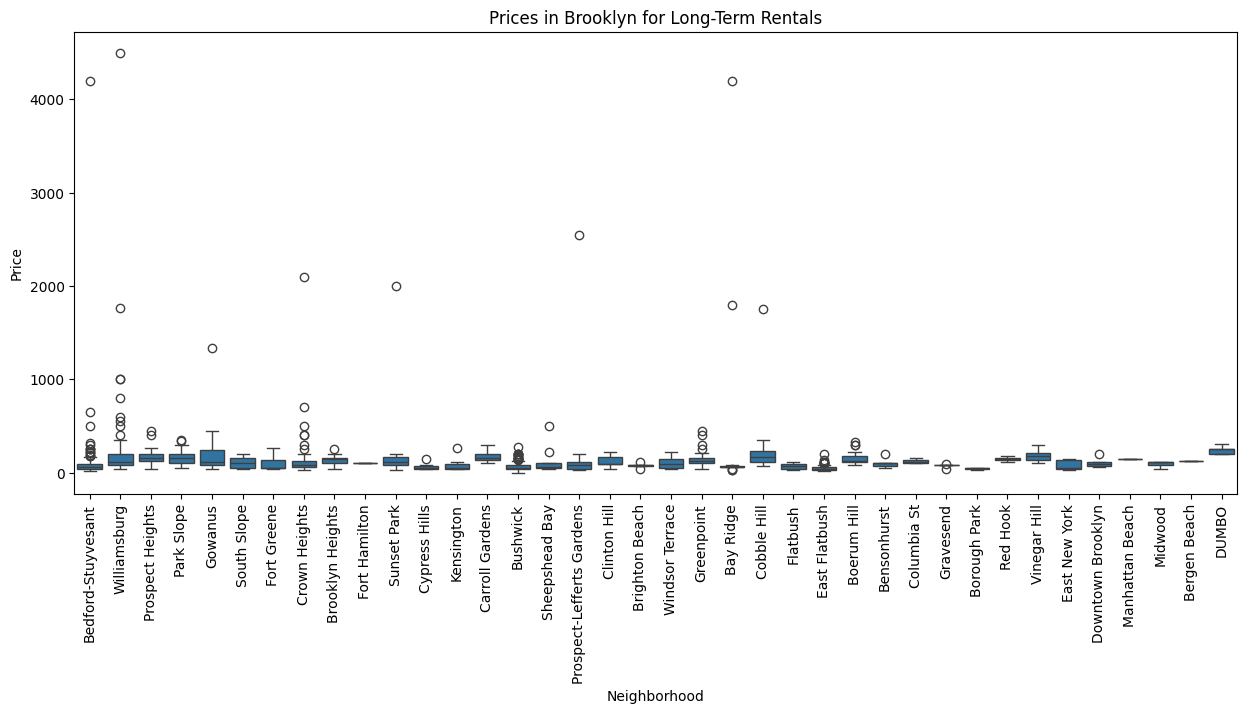

In [64]:
# Focusing on Brooklyn because of the large number of listings but lower average than Manhattan

import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(x='neighborhood', y='price', data=long_term_brooklyn)
plt.xticks(rotation=90)
plt.title('Prices in Brooklyn for Long-Term Rentals')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()



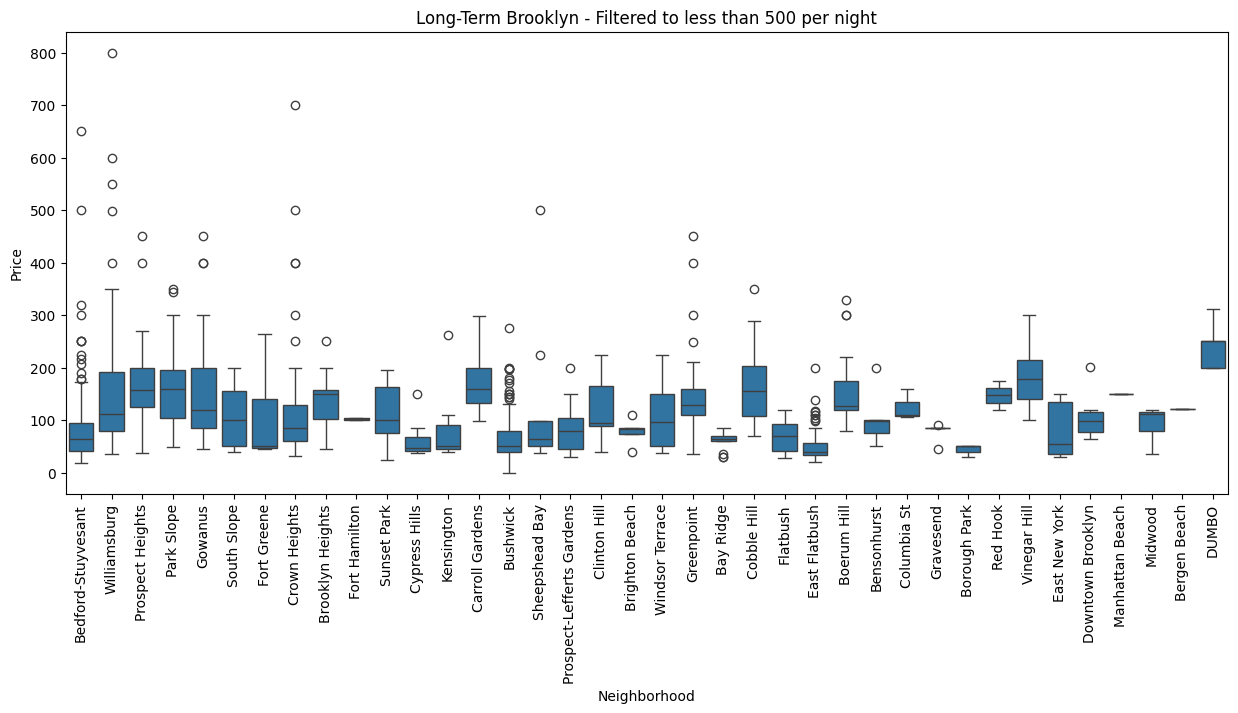

In [65]:
# Removing outliers

filtered_lt_bk = long_term_brooklyn[long_term_brooklyn['price'] < 1000]

plt.figure(figsize=(15,6))
sns.boxplot(x='neighborhood', y='price', data=filtered_lt_bk)
plt.xticks(rotation=90)
plt.title('Long-Term Brooklyn - Filtered to less than 500 per night')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

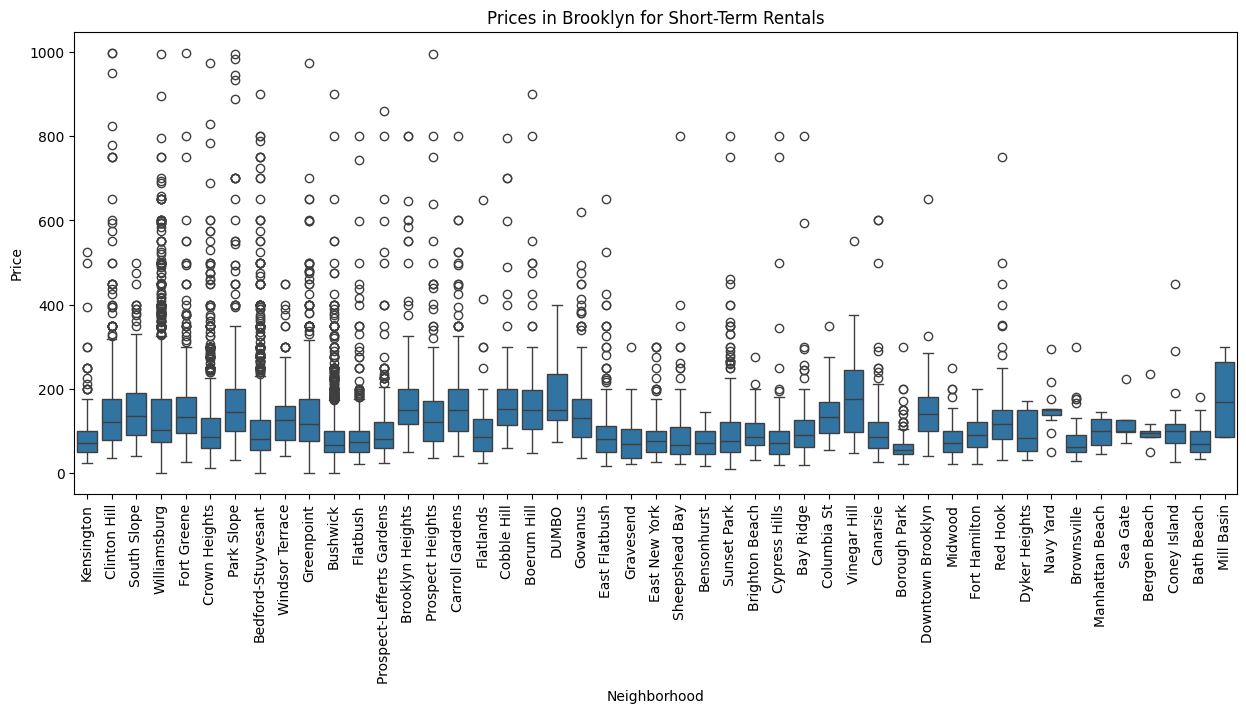

In [66]:
# Comparing this to short term rentals in Brooklyn to compare average price

short_term_brooklyn = data[(data['borough'] == 'Brooklyn') & (data['minimum_nights'] < 30) & (data['price'] < 1000)]

plt.figure(figsize=(15, 6))
sns.boxplot(x='neighborhood', y='price', data=short_term_brooklyn)
plt.xticks(rotation=90)
plt.title('Prices in Brooklyn for Short-Term Rentals')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

It appears that by looking at rentals with a minumum night stay, the effect is to remove the outliers with prices in the general range of 200 and upward. The IQR for both long and short-term rentals seems to be similar, with plenty of units available in the 100-200 range throughout Brooklyn, even in the neighborhoods with more expensive properties. This was fairly clear from the scatter plot above of price vs. minimum night stay, but these box plots show that the neighborhoods in general don't differ by more than 100 per night.

Practicing some of the plotting from the solution set

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   borough                         48895 non-null  object 
 5   neighborhood                    48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Variables for analysis:

Numerical variables: id, host_id, latitude and longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

Categorical variables: borough, neighborhood, room_type

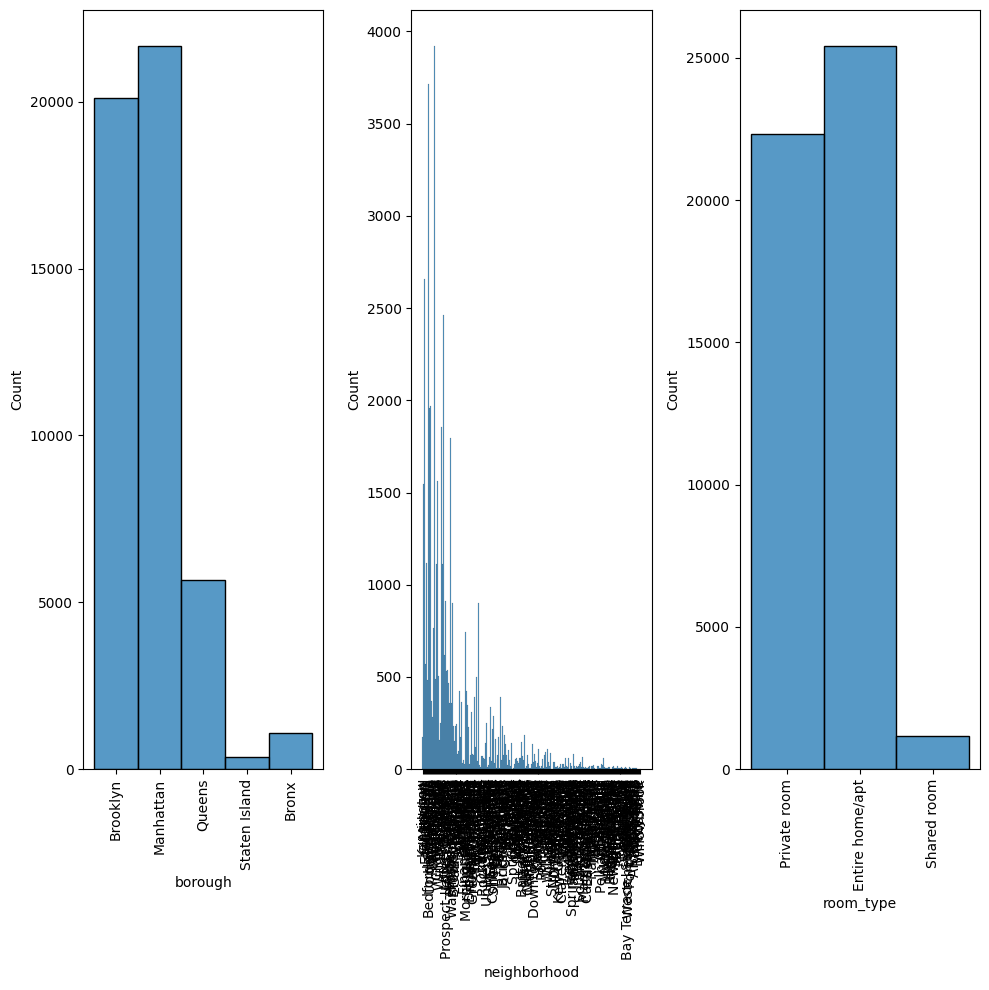

In [68]:
# Analysis of categorical variables

fig, axis = plt.subplots(1, 3, figsize=(10,10))

sns.histplot(ax=axis[0], data=data, x='borough')
axis[0].tick_params(axis='x',rotation=90)

sns.histplot(ax=axis[1], data=data, x='neighborhood')
axis[1].tick_params(axis='x',rotation=90)

sns.histplot(ax=axis[2], data=data, x='room_type')
axis[2].tick_params(axis='x',rotation=90)

plt.tight_layout()
plt.show()


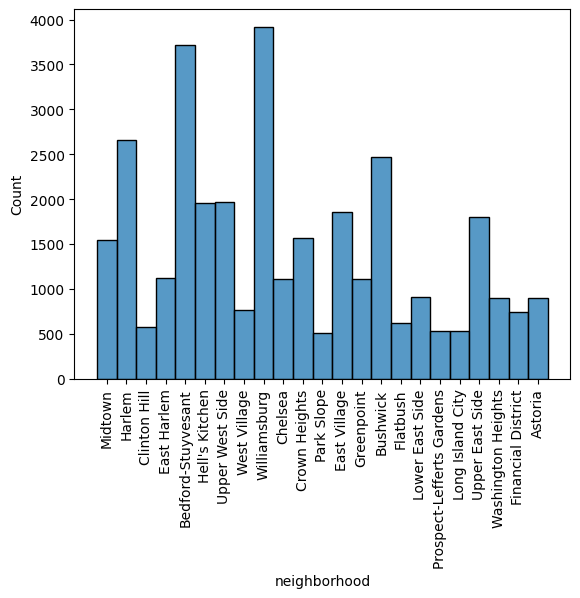

In [69]:
# Filtering neighborhood to those with over 500 listings

neighborhood_counts = data['neighborhood'].value_counts()

neighborhood_counts

filtered_neighborhoods = data[data['neighborhood'].isin(neighborhood_counts[neighborhood_counts > 500].index)]

filtered_neighborhoods


sns.histplot(data=filtered_neighborhoods, x='neighborhood')
plt.xticks(rotation=90)

plt.show()


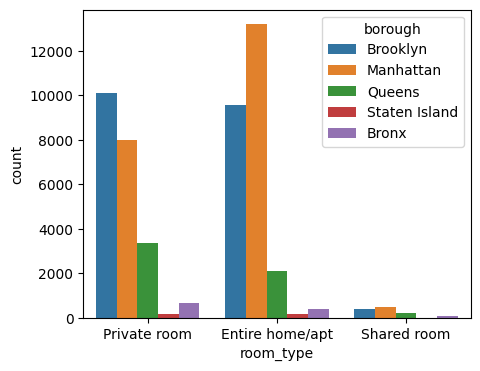

In [70]:
# Looking at borough by room_type

fig, axis = plt.subplots(figsize=(5,4))

sns.countplot(data=data, x='room_type', hue='borough')

plt.show()

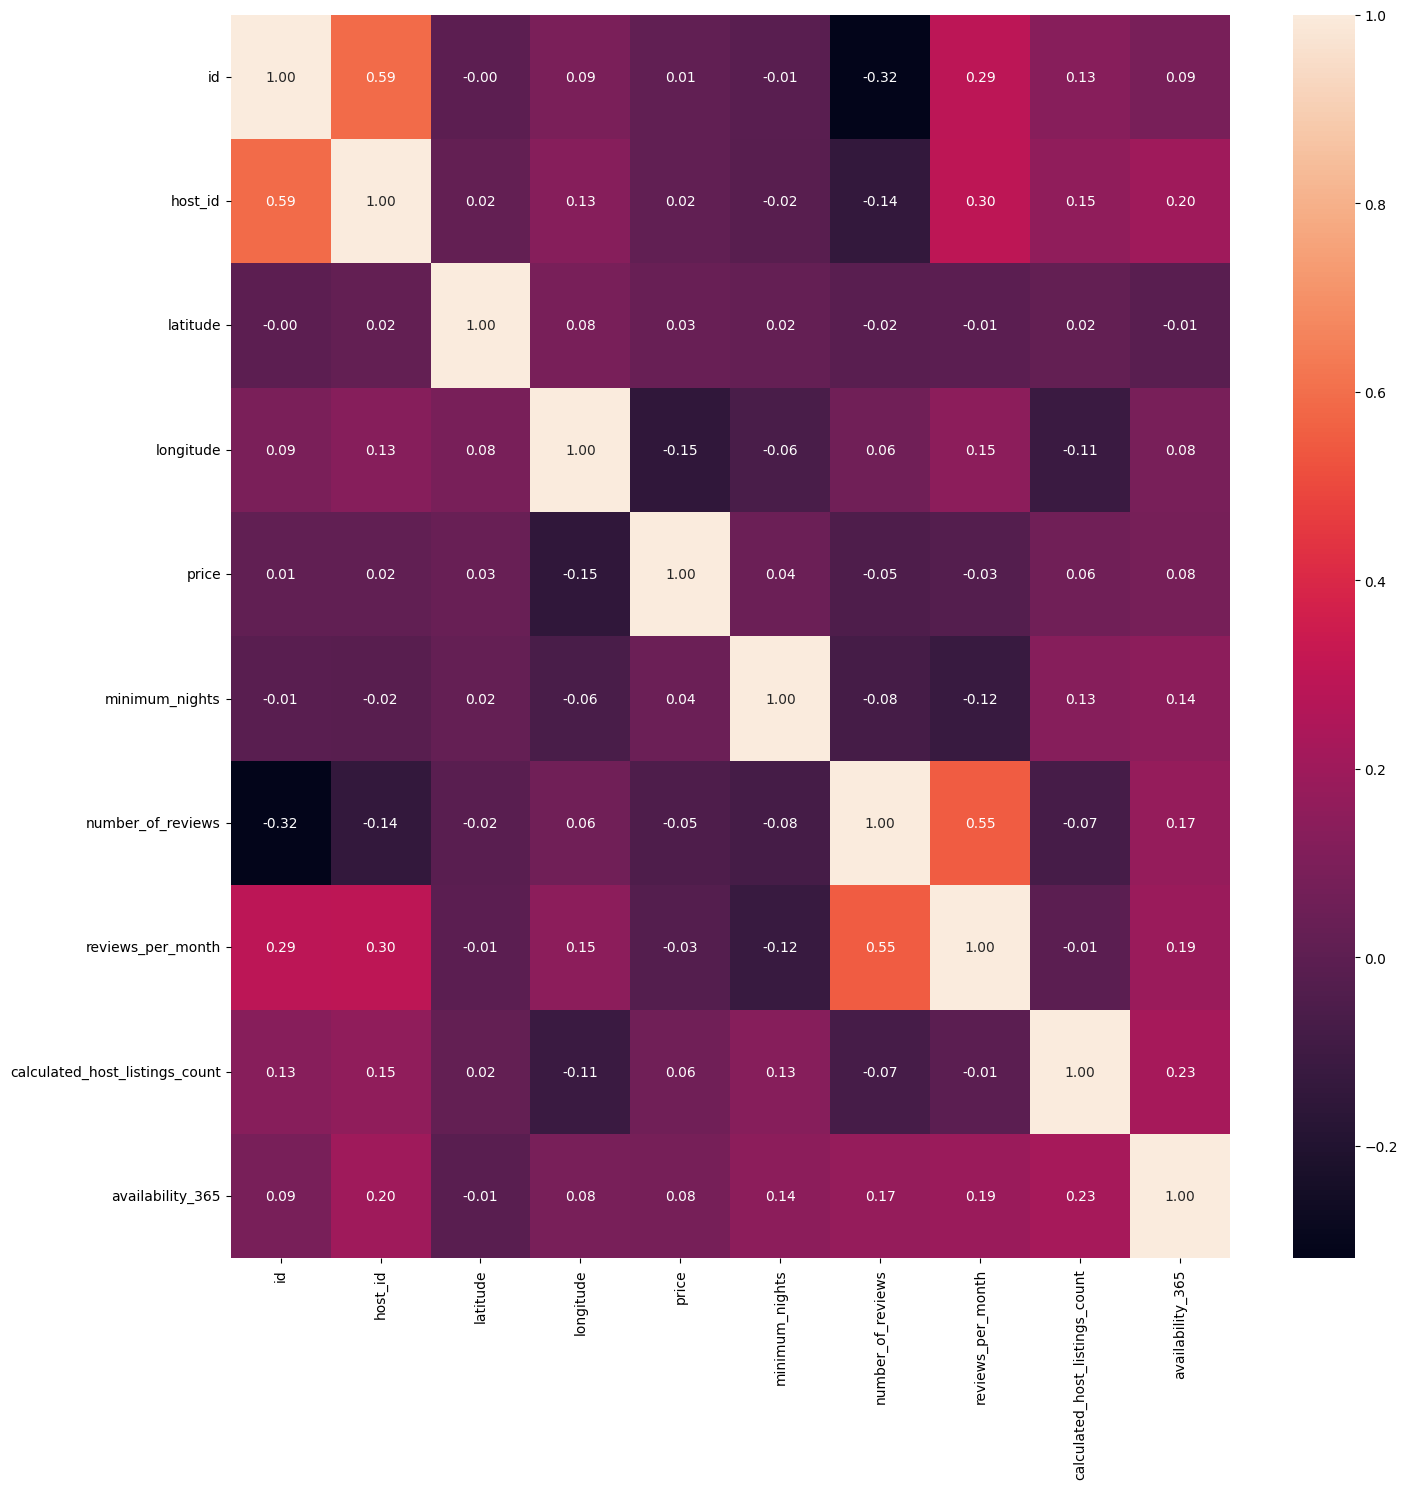

In [71]:
# Heatmap of numerical variables: id, host_id, latitude and longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

fig, axes = plt.subplots(figsize=(15,15))
sns.heatmap(data[['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr(), annot=True, fmt=".2f")
plt.tight_layout()
plt.show()